# **Dataset Reading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time
from sklearn.decomposition import PCA
from sklearn.metrics import cohen_kappa_score

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Project HYPERSPECTRAL/Datasets/Complete_Data_.csv')
data.head()

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,px11,px12,px13,px14,px15,px16,px17,px18,px19,px20,px21,px22,px23,px24,px25,px26,px27,px28,px29,px30,px31,px32,px33,px34,px35,px36,px37,px38,px39,px40,...,px162,px163,px164,px165,px166,px167,px168,px169,px170,px171,px172,px173,px174,px175,px176,px177,px178,px179,px180,px181,px182,px183,px184,px185,px186,px187,px188,px189,px190,px191,px192,px193,px194,px195,px196,px197,px198,px199,px200,target
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,4816,4769,4610,4805,4828,4861,4767,4624,4549,4463,4462,4446,4445,4336,4381,4319,4207,4305,4311,3991,4168,3942,4061,4362,4318,4252,4869,5284,5055,3591,...,1396,1381,1396,1381,1353,1346,1341,1332,1324,1310,1318,1330,1310,1292,1280,1275,1266,1264,1233,1241,1232,1215,1215,1187,1168,1171,1150,1134,1123,1135,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,5141,5100,4994,5172,5290,5289,5217,5053,5033,4939,4931,4941,4902,4824,4859,4805,4698,4794,4806,4452,4628,4433,4643,4967,4853,4760,5449,5768,5684,3987,...,1421,1415,1428,1415,1379,1370,1360,1353,1352,1336,1346,1351,1330,1315,1305,1292,1282,1286,1259,1259,1250,1229,1232,1195,1177,1184,1153,1137,1138,1137,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,5227,5172,5097,5313,5411,5412,5341,5191,5140,5069,5110,5119,5046,4981,5023,4987,4862,4965,4992,4595,4756,4529,4801,5077,4983,4868,5515,5972,5913,4027,...,1446,1440,1443,1425,1390,1379,1376,1363,1355,1347,1361,1356,1341,1330,1321,1304,1290,1289,1263,1269,1261,1245,1241,1214,1185,1188,1156,1147,1149,1144,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,5147,5078,5040,5237,5321,5344,5255,5121,5035,4956,4994,4980,4905,4857,4900,4831,4720,4848,4847,4484,4613,4402,4674,4966,4848,4776,5473,5894,5789,4086,...,1432,1427,1426,1416,1386,1374,1375,1359,1343,1343,1354,1351,1333,1329,1313,1296,1280,1281,1251,1255,1253,1238,1223,1207,1188,1188,1154,1143,1144,1146,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,4853,4857,4734,4879,4976,4958,4885,4754,4647,4532,4586,4591,4492,4453,4497,4398,4297,4408,4401,4102,4227,4075,4264,4529,4490,4438,5001,5378,5321,3779,...,1401,1397,1395,1390,1368,1349,1354,1340,1330,1324,1336,1332,1320,1307,1287,1283,1267,1265,1239,1240,1239,1229,1212,1202,1178,1178,1143,1135,1138,1135,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [ ]:
list=data.loc[:,['target']]
list1=list.values
target=data['target']
target.head()
target=target.to_numpy()
print(target.shape)
print(target)

(21025,)
[3 3 3 ... 0 0 0]


In [ ]:
data=data.drop('target',axis=1)
data.head()
data=data.to_numpy()

In [ ]:
std_data = MinMaxScaler().fit_transform(data)
std_data.shape
acc=np.zeros((15,20))

In [ ]:
print(acc)
print(acc.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(15, 20)


# **KNN Implemenation**

In [ ]:
start=time.time()
for hell in range(2,17):
  start1=time.time()
  model =PCA(n_components=hell)
  pca = model.fit_transform(std_data)
  X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
  print("For band =",hell)
  for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    #print("Accuracy:",metrics.accuracy_score(y_test, y_pred),"for k=",i)
    #print(hell-2,i-1)
    acc[hell-2][i-1]=metrics.accuracy_score(y_test, y_pred)
  end=time.time()
  print("Time taken for band",hell," is =",end-start1,"sec")
  max=np.argmax(acc[hell-2])
  print("Max accuracy=",acc[hell-2][max])
end=time.time()
print("Total Time Taken =",end-start,"sec")


For band = 2
Time taken for band 2  is = 7.042325019836426 sec
Max accuracy= 0.6155727680391357
For band = 3
Time taken for band 3  is = 7.472714185714722 sec
Max accuracy= 0.6715586356841963
For band = 4
Time taken for band 4  is = 8.13159728050232 sec
Max accuracy= 0.6713548036417991
For band = 5
Time taken for band 5  is = 8.191933870315552 sec
Max accuracy= 0.6855551025954614
For band = 6
Time taken for band 6  is = 9.028401136398315 sec
Max accuracy= 0.6975132490827558
For band = 7
Time taken for band 7  is = 9.011638164520264 sec
Max accuracy= 0.6984644652806088
For band = 8
Time taken for band 8  is = 9.21393346786499 sec
Max accuracy= 0.6979209131675499
For band = 9
Time taken for band 9  is = 9.910741806030273 sec
Max accuracy= 0.694659600489197
For band = 10
Time taken for band 10  is = 10.62706971168518 sec
Max accuracy= 0.6915341758391086
For band = 11
Time taken for band 11  is = 10.708582162857056 sec
Max accuracy= 0.6918738959097703
For band = 12
Time taken for band 12  

In [ ]:
print(acc.shape)
print(acc)

(15, 20)
[[0.51664628 0.55816008 0.56658513 0.58363908 0.58411469 0.5913847
  0.59491779 0.59811116 0.60150836 0.60504145 0.60741949 0.60918603
  0.61013725 0.6117679  0.61475744 0.6146895  0.61434978 0.61455361
  0.61557277 0.61448566]
 [0.60307107 0.62338633 0.64349776 0.65355347 0.65749422 0.66021199
  0.66252208 0.666259   0.66727816 0.66707433 0.67006387 0.66986004
  0.67053948 0.67067536 0.66992798 0.66979209 0.67033564 0.67115097
  0.67094714 0.67155864]
 [0.614078   0.63459709 0.65063188 0.65796983 0.66225031 0.66469629
  0.66938443 0.66788966 0.67121892 0.66945237 0.67033564 0.67074331
  0.6713548  0.66836527 0.67033564 0.6702677  0.66979209 0.66931648
  0.67006387 0.6696562 ]
 [0.63969289 0.65633918 0.67454817 0.67801332 0.68032341 0.68331295
  0.6855551  0.68412828 0.68392445 0.6827694  0.68290529 0.68351678
  0.68310912 0.68202201 0.68175024 0.6821579  0.68229379 0.68378856
  0.68419622 0.68229379]
 [0.65708656 0.6685691  0.68521538 0.69228156 0.69499932 0.69724147
  0.6936

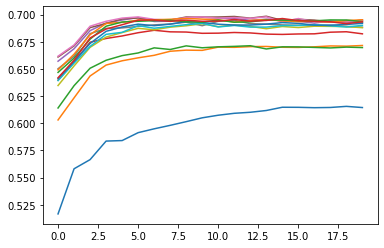

In [ ]:
for i in range(0,14):
  plt.plot(acc[i])
plt.show()

In [ ]:
temp=band=k=0
for i in range(0,14):
  for j in range(0,20):
    if temp<acc[i][j]:
      temp=acc[i][j]
      band=i+2
      k=j+1
print("BAND = ",band,"K-Value=",k,"MAX ACCURACY=",acc[band-2][k-1])

BAND =  7 K-Value= 14 MAX ACCURACY= 0.6984644652806088


Accuracy: 0.6984644652806088
KAppa Coeefecient: 0.5554160605904925
Average Time: 0.46797762513160707


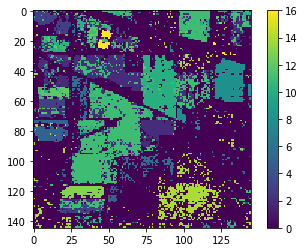

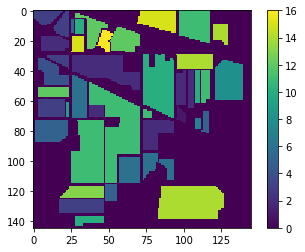

In [ ]:
model =PCA(n_components=band)
pca = model.fit_transform(std_data)
X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("KAppa Coeefecient:",metrics.cohen_kappa_score(y_test, y_pred))
print("Average Time:",(end-start)/320)

output=knn.predict(pca)
output=np.reshape(output,(145,145))
gt=np.reshape(target,(145,145))
from matplotlib.pyplot import imshow, show, colorbar
imshow(output)
colorbar()
show()
imshow(gt)
colorbar()
show()

In [ ]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = k)
scores = cross_val_score(knn, pca, target, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.5182551  0.67330488 0.65180266 0.65463183 0.73966746 0.75784967
 0.73034778 0.67683508 0.70883055 0.59570406]
0.6707229063869071


# **SVM Implementation**

In [ ]:
from sklearn import svm
acs=np.zeros(16)

In [ ]:
start=time.time()
for hell in range(2,17):
  start1=time.time()
  model =PCA(n_components=hell)
  pca = model.fit_transform(std_data)
  X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
  clf = svm.SVC(C=175,kernel='rbf',gamma=0.75)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acs[hell-2]=metrics.accuracy_score(y_test, y_pred)
  end=time.time()
  print("Time taken for band",hell," is =",end-start1,"sec","Accuracy=",acs[hell-2])
end=time.time()
print("Total Time Taken =",end-start,"sec")

Time taken for band 2  is = 10.759113550186157 sec Accuracy= 0.6184943606468271
Time taken for band 3  is = 7.77548885345459 sec Accuracy= 0.6763826606875935
Time taken for band 4  is = 7.117017984390259 sec Accuracy= 0.6866422068215791
Time taken for band 5  is = 6.0272157192230225 sec Accuracy= 0.7142274765593152
Time taken for band 6  is = 4.996236324310303 sec Accuracy= 0.7378040494632423
Time taken for band 7  is = 4.865988254547119 sec Accuracy= 0.7392308737600217
Time taken for band 8  is = 4.739520788192749 sec Accuracy= 0.7418127462970512
Time taken for band 9  is = 4.804008483886719 sec Accuracy= 0.7359016170675363
Time taken for band 10  is = 4.8734657764434814 sec Accuracy= 0.7314173121348009
Time taken for band 11  is = 4.851472616195679 sec Accuracy= 0.7317570322054627
Time taken for band 12  is = 4.944128751754761 sec Accuracy= 0.7361054491099334
Time taken for band 13  is = 4.990297555923462 sec Accuracy= 0.7532273406712868
Time taken for band 14  is = 5.011105537414551

In [ ]:
max=np.argmax(acs)
print(max+2)
model =PCA(n_components=max+2)
pca = model.fit_transform(std_data)
X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
clf = svm.SVC(C=175,kernel='rbf',gamma=0.75)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy=",metrics.accuracy_score(y_test, y_pred))
print("Kappa Coeefeicient=",cohen_kappa_score(y_test, y_pred))
print("Average Time:",(end-start)/14)

13
Accuracy= 0.7528196765864927
Kappa Coeefeicient= 0.6422789775720683
Average Time: 6.153089676584516


0.7962901307966707


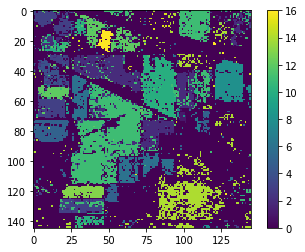

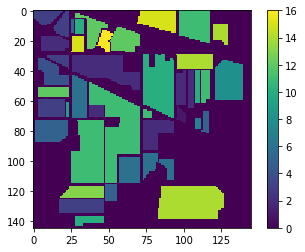

In [ ]:
model =PCA(n_components=max+2)
pca = model.fit_transform(std_data)
X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
clf = svm.SVC(C=175,kernel='rbf',gamma=0.75)
clf.fit(X_train, y_train)
output = clf.predict(pca)
ans=metrics.accuracy_score(output,target)
print(ans)
output=np.reshape(output,(145,145))
gt=np.reshape(target,(145,145))
from matplotlib.pyplot import imshow, show, colorbar
imshow(output)
colorbar()
show()
imshow(gt)
colorbar()
show()

In [ ]:
from sklearn.model_selection import cross_val_score
svm = svm.SVC(C=175,kernel='rbf',gamma=0.75)
scores = cross_val_score(svm, pca, target, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.55967665 0.72515454 0.67189729 0.70470756 0.81645269 0.8320647
 0.78068506 0.68411037 0.77164605 0.66698382]
0.7213378739899913
